# **0. Pendahuluan**
Untuk melakukan penambangan data terhadap data MariBisnis.csv yang merupakan data penjualan rumah di King County, USA. Kami menggunakan metode data mining Cross-Industry Standart Process for Data Mining (CRISP-DM). Berikut adalah ilustrasi dari CRISP-DM :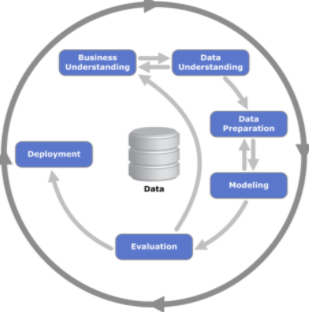

Cross-Industry Standard Process for Data Mining atau CRISP-DM adalah salah satu model proses datamining (datamining framework) yang awalnya (1996) dibangun oleh 5 perusahaan yaitu Integral Solutions Ltd (ISL), Teradata, Daimler AG, NCR Corporation dan OHRA. Framework ini kemudian dikembangan oleh ratusan organisasi dan perusahaan di Eropa untuk dijadikan methodology standard non-proprietary bagi data mining. Versi pertama dari methodologi ini dipresentasikan pada 4th CRISP-DM SIG Workshop di Brussels pada bulan Maret 1999 (Pete Chapman, 1999); dan langkah langkah proses data mining berdasarkan model ini di publikasikan pada tahun berikutnya (Pete Chapman,2000).

Beberapa tahapan dalam CRISP-DM yaitu :


*   Busnisess Understanding
*   Data Understanding
*   Data Preparation
*   Modelling
*   Evaluation
*   Deployment

link dataset https://www.kaggle.com/datasets/harlfoxem/housesalesprediction








Import Library

In [ ]:

#Data Preprocessing and Algebra
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learning and Evaluation Model
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict
!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# **1. Business Understanding**
Pada tahap business understanding ini, kami menentukan tujuan dan persyaratan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut.

Dataset ini berisi harga jual rumah untuk King County,USA yang mencakup Seattle. Rumah yang dijual disini adalah rumah yang dijual antara bulan Mei 2014 hingga Mei 2015.

Tidak adanya acuan dalam harga penjualan rumah melatarbelakangi kami untuk mengembangkan model regresi ini. Diharapkan dengan adanya model ini tidak terjadi kebingungan dalam menentukan harga jual maupun harga beli dari sebuah rumah.

Tujuan dan rumusan masalah yang akan diselesaikan adalah melakukan prediksi terhadap harga rumah, menurut feature-feature yang tersedia seperti jumlah tempat tidur, kamar mandi, dan lain sebagainya yang merupakan atribut dari sebuah rumah dan melakukan eksplorasi dari dataset yang tersedia untuk keperluan bisnis, seperti melihat sebaran harga rumah menurut lokasi, melihat hubungan antara harga rumah dengan kondisi, apakah sudah pernah melakukan renovasi atau tidak, dan lain-lain.

Prediksi harga rumah tersebut berguna untuk penjual maupun pembeli, untuk penjual berguna untuk perkiraan harga yang nantinya akan dipasang pada iklan atau harga yang ditawarkan kepada pembeli. Untuk pembeli berguna untuk melihat kisaran harga yang ditawarkan sehingga dapat menyiapkan budget yang sesuai. Dalam prediksi harga kami akan menggunakan XGboost Regressor dengan Metricsnya adalah RMSE
Eksplorasi dataset berguna untuk perusahaan marketplace jual-beli rumah seperti dalam menentukan segmentasi pasar dan menentukan keputusan bisnis.

# **2. Data Understanding**
Setalah kita mengetahui permasalahan bisnis yang akan kita selesaikan, kita selanjutnya akan mengetahui data yang akan kita gunakan untuk menyelesaikan masalah bisnis tersebut. Kita akan melakukan data describing, untuk mengenal data tersebut.

Connect Dataset

In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")

Melihat sebagian data

In [ ]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8885,2788500090,20141219T000000,309000.0,3,1.00,1820,8142,1.0,0,0,...,7,1040,780,1961,0,98168,47.5050,-122.316,1820,8142
6059,2202500080,20140630T000000,248000.0,3,1.00,950,9400,1.0,0,0,...,7,950,0,1954,0,98006,47.5746,-122.136,1260,9400
2941,1950900245,20141226T000000,123300.0,3,1.00,1150,8050,1.5,0,0,...,7,1150,0,1956,0,98032,47.3740,-122.296,1360,8050
18148,7852020760,20141101T000000,399000.0,3,2.50,1740,3690,2.0,0,0,...,8,1740,0,2000,0,98065,47.5345,-121.867,2100,4944
5373,3148750050,20150325T000000,231000.0,3,2.50,1370,7247,2.0,0,0,...,7,1370,0,1995,0,98032,47.3767,-122.303,1720,8085
11770,3592500800,20141018T000000,1850000.0,5,3.25,3680,6060,2.0,0,0,...,9,2630,1050,1925,0,98112,47.6341,-122.304,3050,5850
14719,7227800065,20141016T000000,199000.0,4,2.00,1440,9477,1.0,0,0,...,5,1440,0,1943,0,98056,47.5093,-122.182,1440,9546
10451,7852000340,20140625T000000,482000.0,3,2.50,2420,7307,2.0,0,0,...,7,2420,0,1998,0,98065,47.5361,-121.871,2420,5577
6448,3356404198,20150129T000000,286000.0,4,2.50,2060,16000,2.0,0,0,...,6,2060,0,1993,0,98001,47.2849,-122.251,1530,8000
12162,7300400320,20150424T000000,340000.0,4,2.50,2810,6481,2.0,0,0,...,9,2810,0,1998,0,98092,47.3330,-122.172,2660,6958


Melihat Baris dan Kolom/Variabel/Featurenya¶


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Terdapat 21613 baris data dan 21 kolom, salah satunya yaitu variabel price merupakan target variabel yang nantinya akan dibuatkan model terhadap variabel tersebut. Berikut adalah penjelasan dari setiap kolomnya :

Melihat Apakah Terdapat Nilai Null Pada Data

In [ ]:
import missingno

<Axes: >

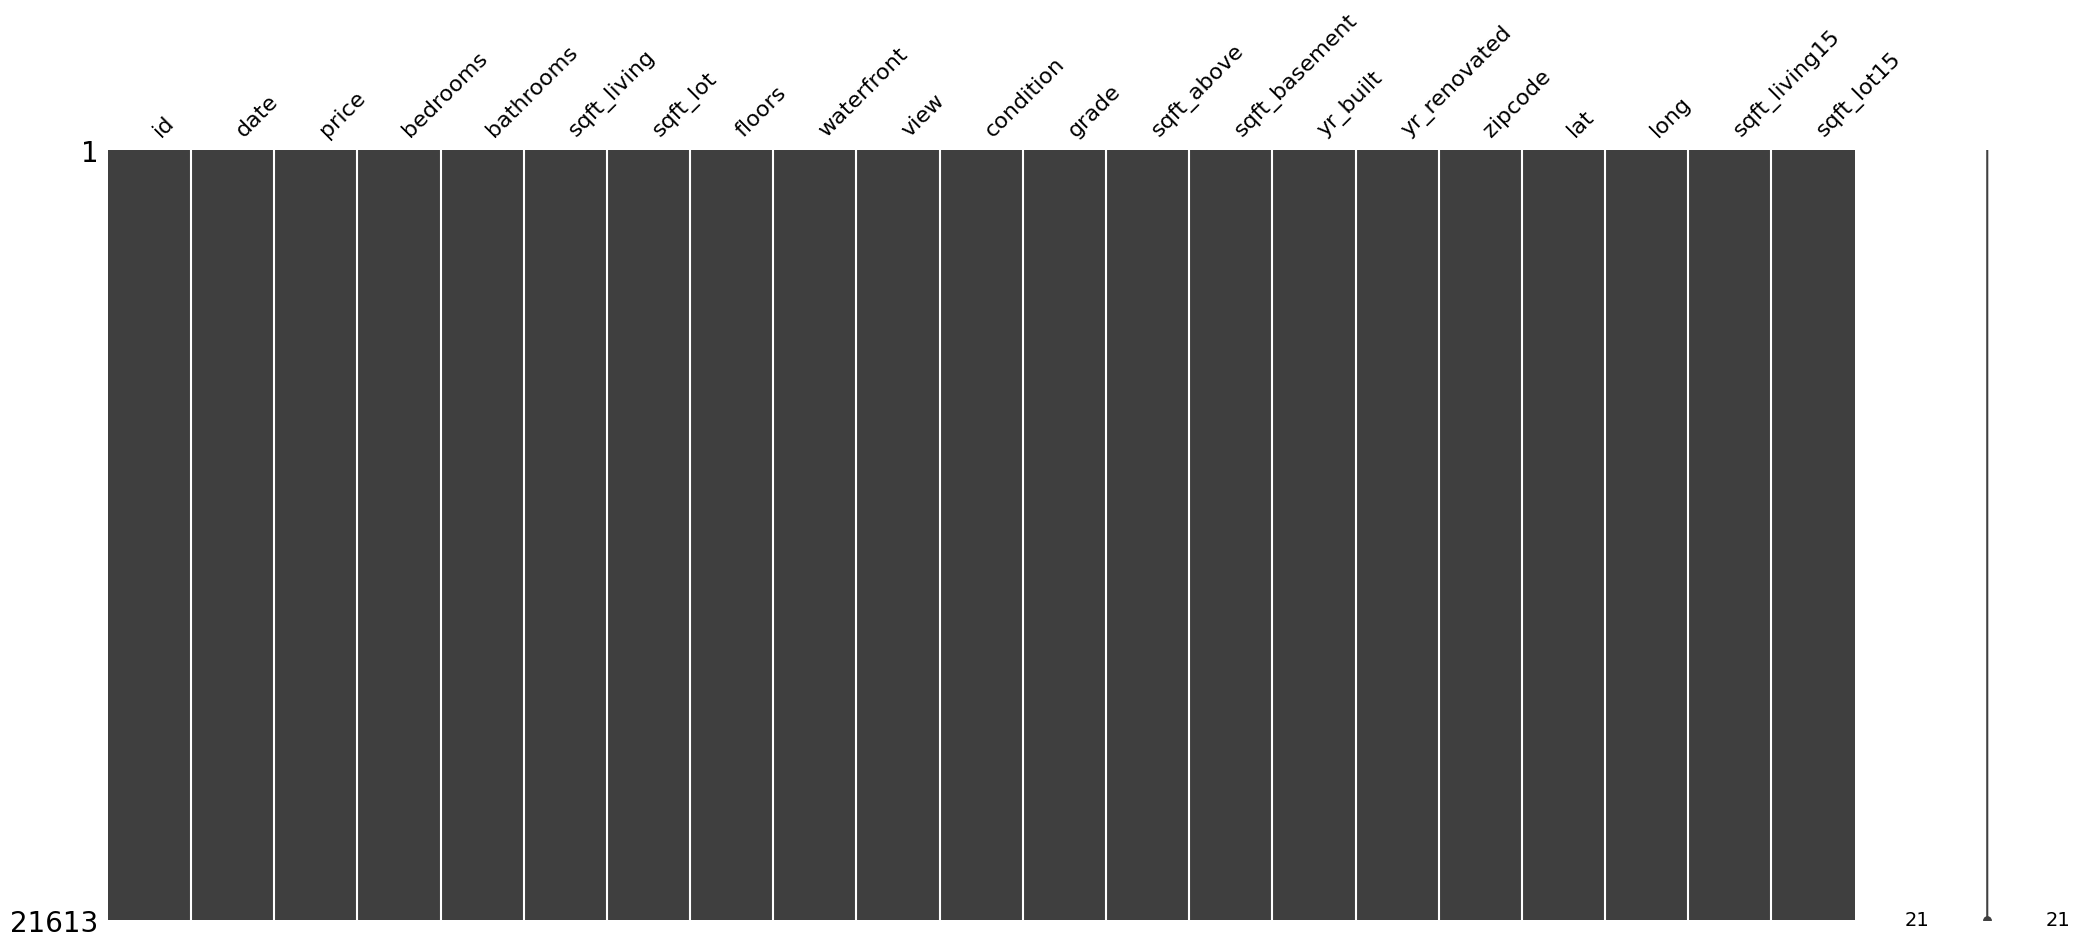

In [ ]:
missingno.matrix(df)

In [ ]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df)

,Total,Percent
id,0,0.0
grade,0,0.0
sqft_living15,0,0.0
long,0,0.0
lat,0,0.0
zipcode,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
sqft_above,0,0.0


# **Exploratory Data Analysis **
Dapat dilihat bahwa tidak terdapat nilai null atau missing value pada dataset tersebut

Menentukan Apakah Sebuah Kolom Itu Merupakan Data Kategorik atau Numerik
Berdasarkan ilmu pengetahuan dan dataset yang digunakan berikut adalah pembagian data numerik dan data kategorik dari setiap kolom, hal ini berguna dalam melakukan Exploratory Data Analysis :
Data Kategorik
id (Nominal)
Date (Nominal)
waterfront (Nominal)
view (Nominal)
condition (Ordinal)
grade (Ordinal)
zipcode (Nomnial)
Data Numerik
price
bedrooms
bathrooms
sqft_living
sqft_lot
floor
sqft_above
sqft_basement
yr_built
yr_renovated
lat
long
sqft_living15
sqft_lot15

Menghitung Nilai Unik Pada Setiap Kolom dan Melakukan Analisis Deskriptif Sederhana

In [ ]:
#Mengitung nilai yang unik
for col in df.columns:
    print('Nilai unik pada feature', col, 'adalah')
    print(df[col].value_counts())
    print('\n')

Nilai unik pada feature id adalah
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64


Nilai unik pada feature date adalah
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64


Nilai unik pada feature price adalah
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64


Nilai unik pada feature bedrooms adalah
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10   

In [ ]:
column = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

numeric = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat',
           'long', 'sqft_living15', 'sqft_lot15']

df[numeric].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Berikut adalah hal yang kita dapatkan pada langkah ini :

Kita dapat melihat pada variabel id terdapat id yang terulang, hal ini menunjukan terdapat beberapa rumah yang dibeli kemudian dijual kembali lebih dari satu kali dalam rentang waktu May 2014 sampai May 2015. Namun, karena lebih banyak variabel id yang tidak terulang kita akan menghapus variabel id ini dalam proses analisis.
Berdasarkan ciri-ciri dataset, data kita bukanlah time-series walaupun terdapat variabel date. Mengepa demikian? karena pada data time-series yang diamati hanyalah satu entitas, sementara data yang kita gunakan lebih dari 1 entitas. Kita dapat menghapus kolom date pada proses modelling, namun kolom ini berguna untuk melihat rata-rata penjualan setiap harinya atau setiap bulannya.
Berdasarkan variabel floor, rumah yang dijual kebanyakan berlantai 1 dan 2
Hanya sedikit rumah yang terletak pada pinggir pantai (163 rumah saja)
Kebanyakan rumah memiliki nilai view 0
Kondisi rumah terbanyak adalah dengan nilai 3
Kebanyakan rumah yang dijual tidak memiliki basement
559 Rumah dibagun pada tahun 2014, kami menganggap rumah tersebut adalah rumah baru
Kebanyakan rumah tidak direnovasi
Harga rata-rata rumah adalah 540088.1 dolar
Berdasarkan standar deviasi lat dan long kita dapat melihat bahwa rumah yang dijual masih dalam satu region yaitu di King County, USA

# Data **Preparation**

Pada tahap ini kita akan melakukan transformasi data dan pembersihan data, setalh itu kita akan sedikit melakukan Exploratory Data Analysis (EDA) untuk mendapatkan insight dari data yang sudah kita buat, sehingga dapat dijadikan alasan dalam pengambilan keputusan bisnis.

3.1 Data Transformation

Pada tahap ini kita akan :

Membulatkan bilangan pada variabel bathroom
Menambahkan kolom is_renovated
Menambahkan kolom have_basement
Menambahkan kolom yr_sold, month, sold, building_age

In [ ]:
#Membulatkan bilangan pada variabel floors dan bathrooms
df["bathrooms"] = np.round(df.bathrooms)
df["floors"] = np.round(df.floors)

In [ ]:
#Menambahkan kolom is_renovated
is_renovated = []
for x in df["yr_renovated"] :
    if x == 0:
        x=0
    else :
        x=1
    is_renovated.append(x)
df["is_renovated"] = np.array(is_renovated)

In [ ]:
#Menambahkan kolom have_basement
have_basement = []
for x in df["sqft_basement"] :
    if x == 0:
        x=0
    else :
        x=1
    have_basement.append(x)
df["have_basement"] = np.array(have_basement)

In [ ]:
#Menambahkan kolom building_age, yr_sold, month_sold
from datetime import datetime
import calendar

df['date'] = df['date'].str.split('T').str[0]

months = []
years = []
for x in df.date :
    datetime_object = datetime.strptime(x, '%Y%m%d')
    month = datetime_object.month
    month = calendar.month_name[month]
    year = datetime_object.year
    months.append(month)
    years.append(year)

df["yr_sold"] = np.array(years)
df["month_sold"] = np.array(months)
df["building_age"] = df["yr_sold"] - df["yr_built"]

3.2 Exploratory Data Analysis

Pada tahap ini kita akan melakukan EDA untuk mendapatkan insight bagi keperluan bisnis. Insight yang diambil selalu dikaitkan dengan target variabel yaitu price. Beberapa visualisasi yang dilakukan :

Sebaran Harga Rumah
Bulan dengan Penjualan Terbanyak
Banyaknya Penjualan Setiap Tahun
Harga Terhadap Kepunyaan Basement atau Tidak
Harga Terhadap Apakah Rumah Sudah Direnovasi atau Belum
Harga Terhadap Letak Rumah yang Berada Dipinggir Air atau Tidak
Harga Rumah terhadap View
Harga Rumah terhadap Condition
Harga Rumah terhadap Grade
Harga Rumah terhadap Jumlah Lantai
Harga Rumah terhadap Banyaknya Kamar Tidur
Harga Rumah terhadap Banyaknya Bathroom
Harga Rumah terhadap sqft_lot
Harga Rumah terhadap sqft_lot15
Harga Rumah terhadap sqft_living
Harga Rumah terhadap sqft_living15
Harga Rumah terhadap building_age
Harga Rumah terhadap sqft_basement
Harga Rumah terhadap sqft_above
Komponen Numerik yang Penting Dalam Penentuan Harga Rumah
Komponen Kategorik yang Penting Dalam Penentuan Harga Rumah
Melihat sebaran harga rumah terdahap lokasi rumah

Text(0.5, 1.0, 'Sebaran Harga Rumah')

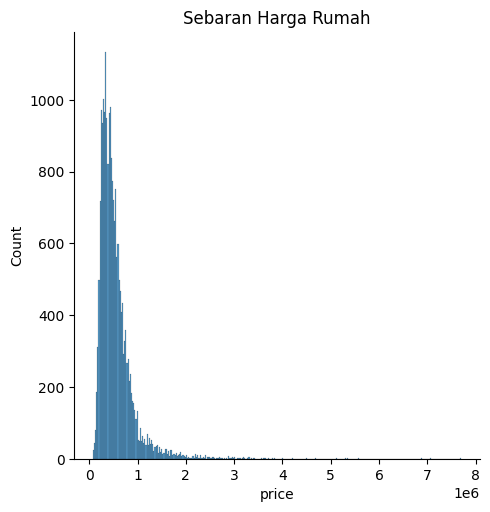

In [ ]:
# Sebaran Harga Rumah
sns.displot(df.price)
plt.title("Sebaran Harga Rumah")

In [ ]:
df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

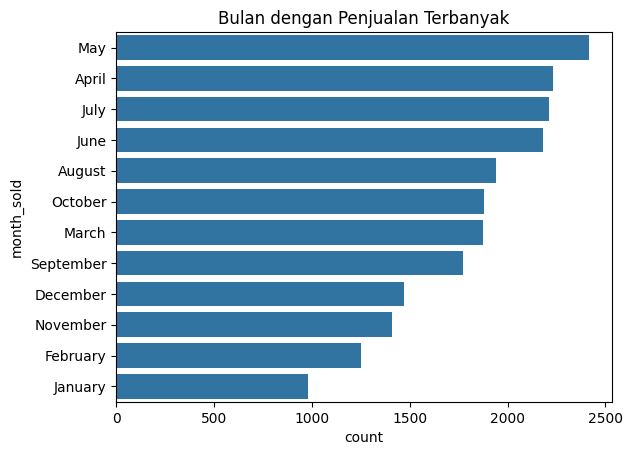

In [ ]:
#Bulan dengan Penjualan Terbanyak
sns.countplot(y ='month_sold', data = df,order = df["month_sold"].value_counts().index)

plt.title("Bulan dengan Penjualan Terbanyak")
# Show the plot
plt.show()

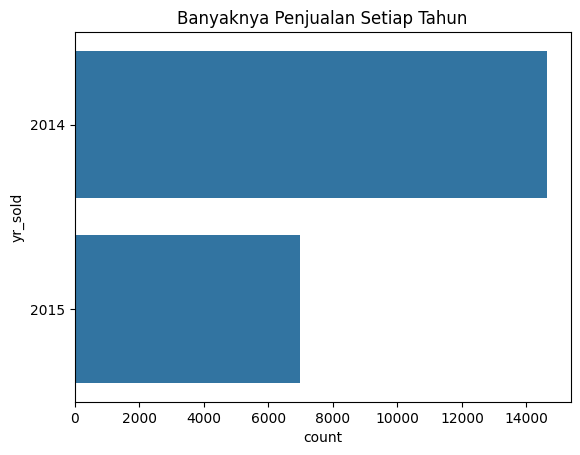

In [ ]:
#Banyaknya Penjualan Setiap Tahun
sns.countplot(y ='yr_sold', data = df,order = df["yr_sold"].value_counts().index)

plt.title("Banyaknya Penjualan Setiap Tahun")
# Show the plot
plt.show()

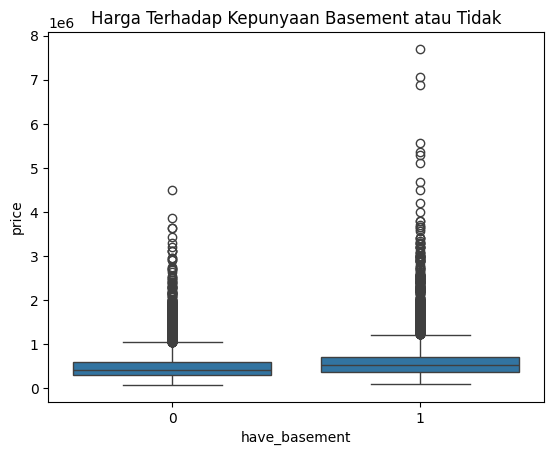

In [ ]:
#Harga Terhadap Kepunyaan Basement atau Tidak
sns.boxplot(y=df["price"],x = df['have_basement'])
plt.title("Harga Terhadap Kepunyaan Basement atau Tidak")
# Show the plot
plt.show()

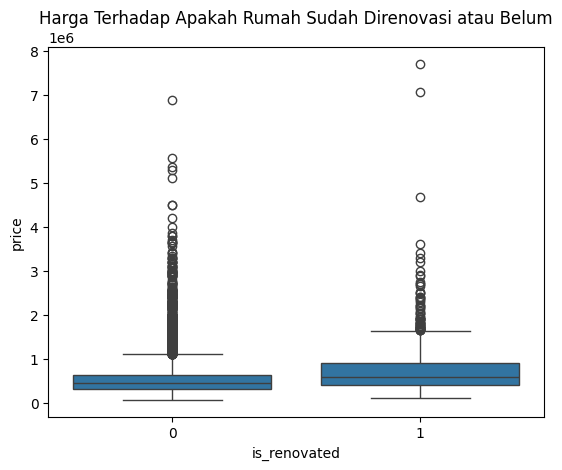

In [ ]:
#Harga Terhadap Apakah Rumah Sudah Direnovasi atau Belum

sns.boxplot(y=df["price"],x = df['is_renovated'])
plt.title("Harga Terhadap Apakah Rumah Sudah Direnovasi atau Belum")
# Show the plot
plt.show()

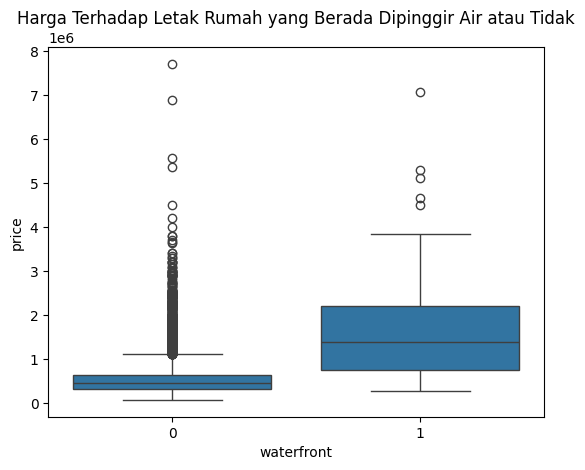

In [ ]:
#Harga Terhadap Letak Rumah yang Berada Dipinggir Air atau Tidak
sns.boxplot(y=df["price"],x = df['waterfront'])

plt.title("Harga Terhadap Letak Rumah yang Berada Dipinggir Air atau Tidak")
# Show the plot
plt.show()

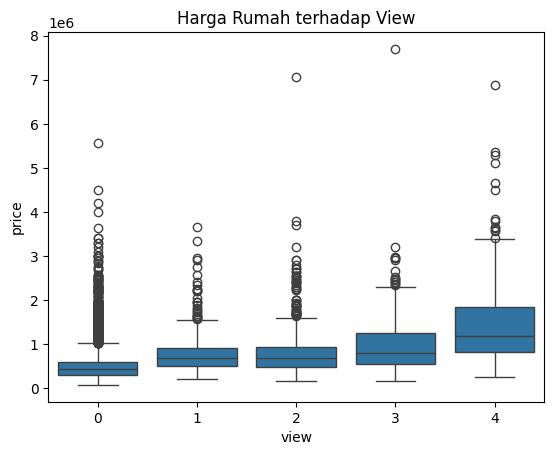

In [ ]:
#Harga Rumah terhadap View
sns.boxplot(y=df["price"],x = df['view'])

plt.title("Harga Rumah terhadap View")
# Show the plot
plt.show()

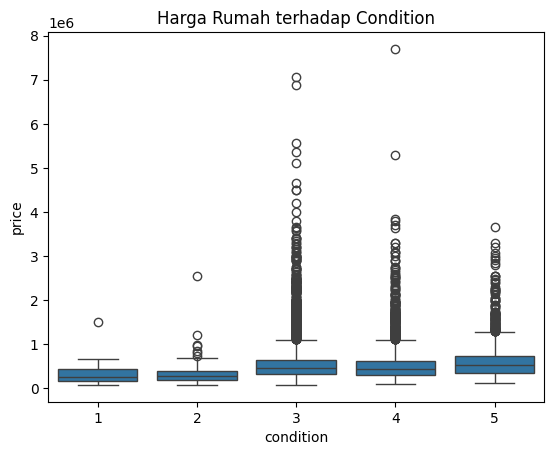

In [ ]:
#Harga Rumah terhadap Condition
sns.boxplot(y=df["price"],x = df['condition'])

plt.title("Harga Rumah terhadap Condition")
# Show the plot
plt.show()

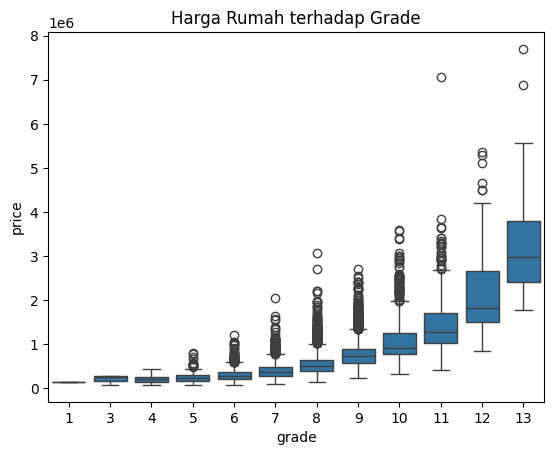

In [ ]:
#Harga Rumah terhadap Grade
sns.boxplot(y=df["price"],x = df['grade'])

plt.title("Harga Rumah terhadap Grade")
# Show the plot
plt.show()

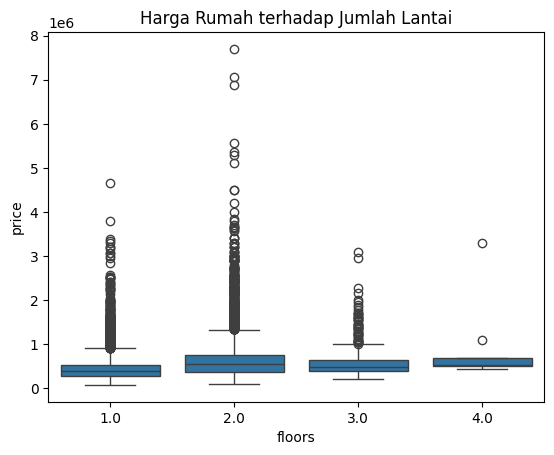

In [ ]:
#Harga Rumah terhadap Jumlah Lantai

sns.boxplot(y=df["price"],x = df['floors'])

plt.title("Harga Rumah terhadap Jumlah Lantai")
# Show the plot
plt.show()

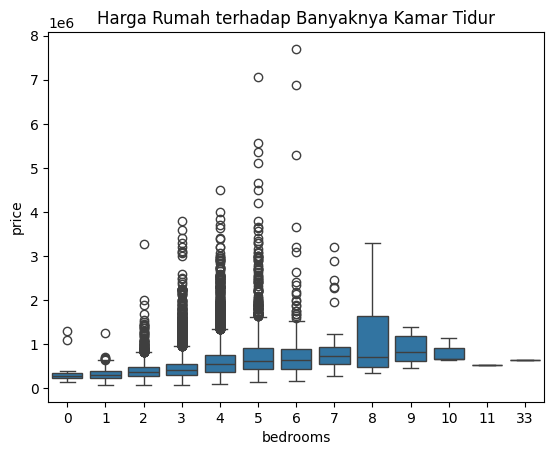

In [ ]:
#Harga Rumah terhadap Banyaknya Kamar Tidur
sns.boxplot(y=df["price"],x = df['bedrooms'])

plt.title("Harga Rumah terhadap Banyaknya Kamar Tidur")
# Show the plot
plt.show()

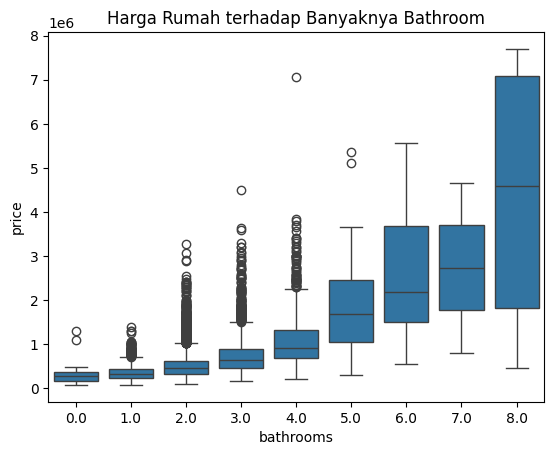

In [ ]:
#Harga Rumah terhadap Banyaknya Bathroom
sns.boxplot(y=df["price"],x = df['bathrooms'])

plt.title("Harga Rumah terhadap Banyaknya Bathroom")
# Show the plot
plt.show()


Text(0.5, 1.0, 'Harga Rumah terhadap sqft_living')

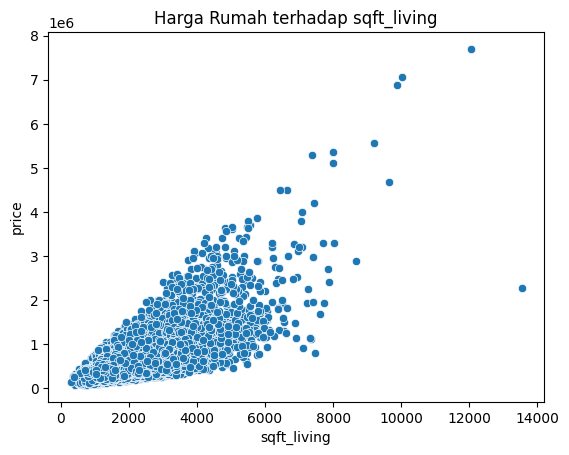

In [ ]:
#Harga Rumah terhadap sqft_living
sns.scatterplot(y=df["price"],x = df['sqft_living'])
plt.title("Harga Rumah terhadap sqft_living")

Text(0.5, 1.0, 'Harga Rumah terhadap building_age')

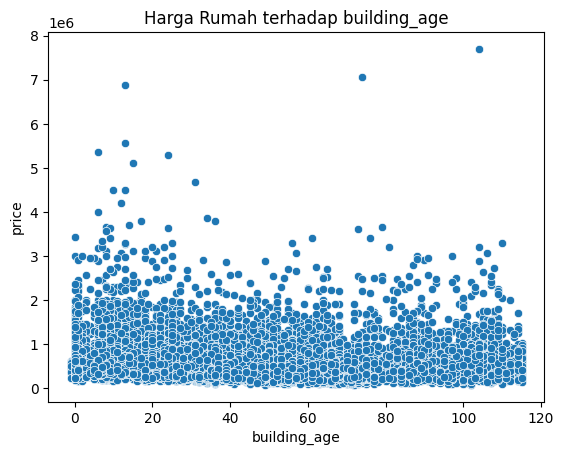

In [ ]:
#Harga Rumah terhadap building_age
sns.scatterplot(y=df["price"],x = df['building_age'])
plt.title("Harga Rumah terhadap building_age")

Text(0.5, 1.0, 'Harga Rumah terhadap sqft_basement')

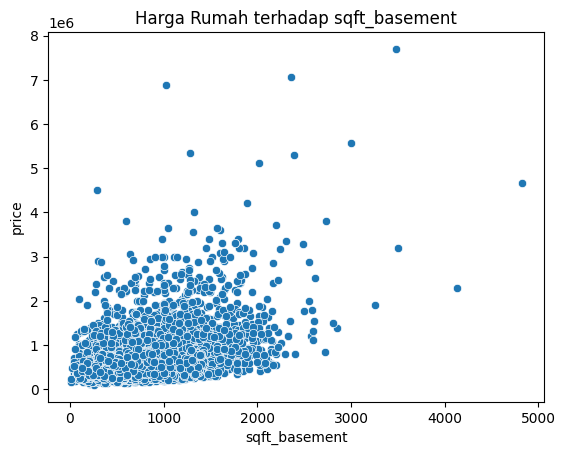

In [ ]:
#Harga Rumah terhadap sqft_basement
sns.scatterplot(y=df[df['sqft_basement']!=0]["price"],x = df[df['sqft_basement']!=0]["sqft_basement"])
plt.title("Harga Rumah terhadap sqft_basement")

In [ ]:
#Memisahkan Kolom Numerik dan Kategorik
numeric = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15','building_age','yr_sold']

categoric = ["grade","view","condition","zipcode","waterfront"]

categoric = ["grade","view","have_basement","is_renovated","condition","zipcode","waterfront","price"]

df_numeric = df[numeric]
df_categoric = df[categoric]

In [ ]:
#Melihat Korelasi harga terhadap variabel numerik
Corr = pd.DataFrame((abs(df_numeric.corr()['price']).sort_values(ascending = False)))
Corr = Corr.reset_index()
Corr = Corr.drop(Corr[Corr.price == 1].index)
#Mengubah Nama Kolom
Corr = Corr.rename({'price': 'Correlation_Score'}, axis=1)
Corr

,index,Correlation_Score
1,sqft_living,0.702035
2,sqft_above,0.605567
3,sqft_living15,0.585379
4,bathrooms,0.518912
5,sqft_basement,0.323816
6,bedrooms,0.308350
7,lat,0.307003
8,floors,0.244906
9,yr_renovated,0.126434
10,sqft_lot,0.089661


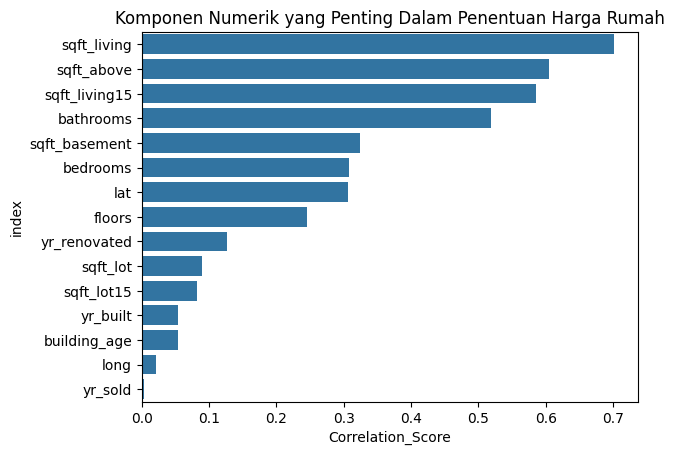

In [ ]:
sns.barplot(x=Corr["Correlation_Score"],y = Corr['index'])
plt.title("Komponen Numerik yang Penting Dalam Penentuan Harga Rumah")
# Show the plot
plt.show()

In [ ]:
#Melihat Korelasi harga terhadap variabel kategorik
Corr = pd.DataFrame((abs(df_categoric.corr(method='kendall')['price']).sort_values(ascending = False)))
Corr = Corr.reset_index()
Corr = Corr.drop(Corr[Corr.price == 1].index)
#Mengubah Nama Kolom
Corr = Corr.rename({'price': 'Correlation_Score'}, axis=1)
Corr

,index,Correlation_Score
1,grade,0.527834
2,view,0.237573
3,have_basement,0.167626
4,waterfront,0.094069
5,is_renovated,0.082575
6,condition,0.014481
7,zipcode,0.009827


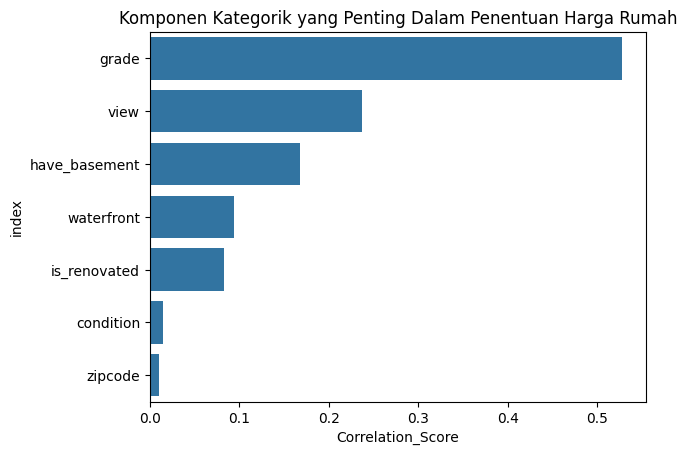

In [ ]:
sns.barplot(x=Corr["Correlation_Score"],y = Corr['index'])
plt.title("Komponen Kategorik yang Penting Dalam Penentuan Harga Rumah")
# Show the plot
plt.show()

In [ ]:
#Save File Bersih
df.to_csv("MariBisnisClean.csv",index=False)

# 4. **Modelling**

Pada tahap modelling, pertama kita memisahkan X dan y dimana variabel y adalah variabel target kita yaitu "price". Setelah itu kita melakukan hyperparameter tuning untuk mencari parameter mana yang terbaik yang akan digunakan pada model XGboost yang kita buat. Selanjutnya kita memisahkan data menjadi data latih dan data test. Kemudian melakukan testing dan melakukan plotting terhadap hasil aktual vs hasil prediksi. Berdasarkan hasil EDA, kita hanya memilih beberapa variabel yang akan dimasukan ke variabel X, yaitu :

"sqft_living15"
"sqft_living"
"sqft_above"
"sqft_basement"
"bathrooms"
"bedrooms"
"floors"
"grade"
"view"
"have_basement"
"waterfront"
"is_renovated"
"lat"
"long"

In [ ]:
#Memisahkan X dan y
selected = ["sqft_living15","sqft_living","sqft_above","sqft_basement","bathrooms","bedrooms","floors","grade","view","have_basement","waterfront","is_renovated","price","lat","long"]
df_selected = df[selected]

X = df_selected.drop(columns="price")
y = df_selected["price"]

In [ ]:
#Parameter Tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'tree_method': ['gpu_hist'],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
#Melatih Model
xgb_model = XGBRegressor(colsample_bytree = 0.5,
 learning_rate = 0.01,
 max_depth = 7,
 min_child_weight = 5,
 n_estimators = 500,
 objective = 'reg:squarederror',
 subsample= 0.5)
model = xgb_model.fit(X_train, y_train)

In [ ]:
# Memprediksi nilai y dari X_test
y_predict = model.predict(X_test)


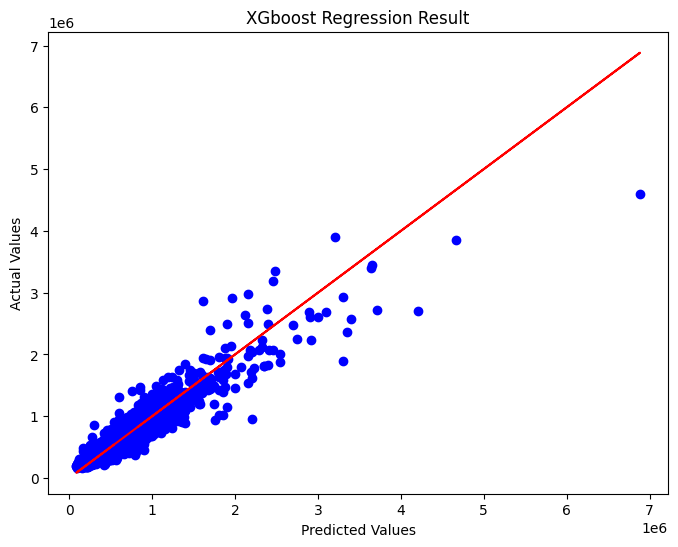

In [ ]:
# Aktual vs Prediksi

fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(y_test,y_predict,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('XGboost Regression Result')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **5. Evaluation**

Pada tahap ini kita akan melakukan evaluasi terhadap model yang kita buat, menggunakan cross-validation, dengan jumlah fold = 5. Metrics yang digunakan dalam evaluasi ini ada 3 yaitu mean_absolute_error, root_mean_squared_error, dan yang terakhir adalah r2_score.

In [ ]:
#Cross-Validation
scoring = {'MSE' : make_scorer(mean_squared_error),
          'MAE' : make_scorer(mean_absolute_error),
           'R2' : make_scorer(r2_score)
          }
kfold = KFold(n_splits=5, random_state=1234, shuffle = True)
results_reg = cross_validate(estimator=xgb_model,X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
results_reg

{'fit_time': array([8.65620518, 5.61172223, 2.90665054, 1.37791371, 1.36130643]),
 'score_time': array([0.15964198, 0.05633926, 0.05710697, 0.05985689, 0.05652952]),
 'test_MSE': array([1.96949981e+10, 1.63868530e+10, 1.86199980e+10, 1.56232940e+10,
        1.49429614e+10]),
 'test_MAE': array([74200.87881318, 74165.64633935, 76885.19492757, 74042.07954217,
        72575.13622166]),
 'test_R2': array([0.85024679, 0.87848118, 0.86818566, 0.88213874, 0.88819745])}

In [ ]:
rmse = np.sqrt(results_reg.get('test_MSE'))
mae = (results_reg.get('test_MAE'))
r2 = (results_reg.get('test_R2'))
print('mean_RMSE : ', "%.15f" % (rmse.mean()))
print('mean_MAE : ', "%.15f" % (mae.mean()))
print('mean_R2 : ', "%.15f" % (r2.mean()))

mean_RMSE :  130407.941773208469385
mean_MAE :  74373.787168783892412
mean_R2 :  0.873449963872488


# **Deployment**

Menyimpan Model kemudian di deploy di streamlit

In [ ]:
import pickle
import xgboost as xgb

# Assuming 'xg_model' is your trained XGBoost model
# Save the model to a file
with open('xgmodel.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

# Now, the model is saved to 'xgmodel.pkl' in your current working directory.


In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=e6b9bb42436036ae5e8a8054180ff328e905d52b78da65a7e2fee04ad068bab1
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


In [ ]:
!streamlit app.py


Usage: streamlit [OPTIONS] COMMAND [ARGS]...
Try 'streamlit --help' for help.

Error: No such command 'app.py'.


In [ ]:
!streamlit app.py &

Usage: streamlit [OPTIONS] COMMAND [ARGS]...
Try 'streamlit --help' for help.

Error: No such command 'app.py'.


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import pickle

# Load the model
model = pickle.load(open('xgmodel.pkl', 'rb'))

# Define the app
def main():
    st.title('House Price Prediction App')

    # Define the inputs (make sure to add all features your model needs)
    bedrooms = st.number_input('Number of Bedrooms', min_value=0)
    bathrooms = st.number_input('Number of Bathrooms', min_value=0)
    sqft_living = st.number_input('Living Area Size (in sqft)', min_value=0)
    # ... include other features as necessary

    # Button to make prediction
    if st.button('Predict Price'):
        # Make sure to construct the DataFrame with the exact same feature order as your training data
        input_data = pd.DataFrame([[bedrooms, bathrooms, sqft_living]],
                                  columns=['bedrooms', 'bathrooms', 'sqft_living'])
        prediction = xg_model.predict(input_data)
        st.success(f'The predicted house price is ${prediction[0]:,.2f}')

# Run the app
if __name__ == '__main__':
    main()



Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2024-01-27 01:14:54--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  55.9MB/s    in 0.2s    

2024-01-27 01:14:54 (55.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2024-01-27 01:14:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.28M  55.7MB/s    in 0.2s    

2024-01-27 01:14:55 (55.7 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13921656/13921656]



In [ ]:
!pip install pyngrok

In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
#auth
#curl

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:

from pyngrok import ngrok

# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
print(public_url)


http://54d4-34-138-53-12.ngrok-free.app


In [ ]:
from pyngrok import ngrok

# If there's an ngrok process already running, kill it.
ngrok.kill()



In [ ]:
!nohup streamlit run app.py &



nohup: appending output to 'nohup.out'
